# Return of Investment (ROI)

The ROI is a percentage calculation that compares the current value of an investment to its initial cost, indicating either a gain or a loss is use to:

- The performance estimate that the initial plan for investment laid out.
- The performance estimate that the initial plan for investment laid out.
- The performance of a benchmark, such as a sector index or a full market index. Examples of sector indexes are the technology and biotech sectors. An example of a full market index is the S&P 500.

With the ROI, both quantitative financial analysts and investors can determine the success or failure of an investment. This helps them make more informed decisions about future investments.

## Calcualate the ROI


          roi = ((current_investment_value - initial_investment_value) / initial_investment_value ) * 100

In [6]:
# Example
initial_investment_value = 75000
current_investment_value= 83750

roi = ((current_investment_value - initial_investment_value) / initial_investment_value ) * 100
print(f" The ROI % value is: {roi: .2f}%")

 The ROI % value is:  11.67%


In [8]:
#Example 2
initial_investment_value = 6250
roi_prc = 7.75
roi = 7.75 / 100

current_investment_value = (roi * initial_investment_value) + initial_investment_value
current_investment_value


6734.375

# Calculatin the Daily Returns 

For a quantitative financial analyst, one of the most common uses of the ROI formula is to determine the daily returns of a particular investment asset. The daily return measures the percentage of the increase or decrease of the investment between the closing price on the current day and that on the previous day.We subtract the closing price of the previous day from the closing price of the current day. We then divide the resulting number by the closing price of the previous day. The result is the daily return.

## Calculate dialy return formula

            daily_return = ((stock_current_close_price - stock_previous-close-price) /  stock_previous-close-price)

In [9]:
# Example 
spx_current_close = 1884.660034
spx_prior_close = 1881.140015
daily_return = ((spx_current_close - spx_prior_close ) / spx_prior_close)
daily_return_pct = daily_return * 100
print(f"The daily return for the S&P 500 was {daily_return: .5f} or {daily_return_pct: .2f}%")

The daily return for the S&P 500 was  0.00187 or  0.19%


In [14]:
#Example 2
stock_current_close_price = 31.75
stock_previous_close_price = 32.64
daily_return = ((stock_current_close_price - stock_previous_close_price) /  stock_previous_close_price) * 100
print(f"{daily_return: .2f}%")


-2.73%


# Calculating week/month / year return
Besides calculating a daily return over several days, well, daily, an analyst might have to calculate the return from week to week, month to month, or year to year. This process can be tedious and cumbersome.With the shift function, you can define the length of the period that you want to associate with the return calculation.

## Shift function in daily returns

In [16]:
import pandas as pd
from pathlib import Path

In [18]:
sp500_csv = pd.read_csv("./sp500_close.csv", index_col="Date",parse_dates=True,infer_datetime_format=True)
sp500_csv.head()

,Adj Close
Date,
2014-05-02,1881.140015
2014-05-05,1884.660034
2014-05-06,1867.719971
2014-05-07,1878.209961
2014-05-08,1875.630005


In [20]:
# Using the shift of 1 to shift every elemint in th adj close column
sp500_csv["Shift_1"] = sp500_csv.shift(1)
sp500_csv.head()

,Adj Close,Shift_1
Date,,
2014-05-02,1881.140015,NaN
2014-05-05,1884.660034,1881.140015
2014-05-06,1867.719971,1884.660034
2014-05-07,1878.209961,1867.719971
2014-05-08,1875.630005,1878.209961


In [21]:
# Review the S&P 500 daily price DataFrame
sp500_csv.head()

# Create the daily_returns Dataframe from the S&P 500 prices using the shift(1) function
daily_returns = (sp500_csv - sp500_csv.shift(1)) / sp500_csv.shift(1)

# Review the daily_returns DataFrame
daily_returns.head()

,Adj Close,Shift_1
Date,,
2014-05-02,NaN,NaN
2014-05-05,0.001871,NaN
2014-05-06,-0.008988,0.001871
2014-05-07,0.005616,-0.008988
2014-05-08,-0.001374,0.005616


In [28]:
stock_abc = pd.DataFrame({"close" : [11.25, 11.98, 10.74, 11.16, 12.35, 12.87, 13.03, 13.14, 13.37, 12.99]})
stock_abc.head()

,close
0,11.25
1,11.98
2,10.74
3,11.16
4,12.35


In [35]:
daily_returns = ((stock_abc - stock_abc.shift(1)) / stock_abc.shift(1)) * 100
daily_returns.head()

,close
0,NaN
1,6.488889
2,-10.350584
3,3.910615
4,10.663082


# The pct_change Function
With the shift function, you need to specify the number 1 to access the element that’s just before the current one. However, by default, the Pandas pct_change function calculates the percentage of change between the current element and the one that’s just before it in a Series, or column.

In [39]:
# Example
sp500_csv = pd.read_csv("./sp500_close.csv", index_col="Date",parse_dates=True,infer_datetime_format=True)
sp500_csv.head()

,Adj Close
Date,
2014-05-02,1881.140015
2014-05-05,1884.660034
2014-05-06,1867.719971
2014-05-07,1878.209961
2014-05-08,1875.630005


In [44]:
daily_returns = sp500_csv.pct_change()
daily_returns.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374


In [45]:
stock_def = pd.DataFrame({'close' : [11.25, 11.98, 10.74, 11.16, 12.35, 12.87, 13.03]})
daily_return_new = stock_def.pct_change()
daily_return_new.head()

,close
0,NaN
1,0.064889
2,-0.103506
3,0.039106
4,0.106631


In [46]:
# Calculating daily return for a 1 year period
daily_returns_1_year = daily_returns.loc["2018-05-01":"2019-05-01"]
daily_returns_1_year.describe()

,Adj Close
count,252.000000
mean,0.000437
std,0.009392
min,-0.032864
25%,-0.002966
50%,0.000735
75%,0.004895
max,0.049594


In [47]:
daily_returns_3_year = daily_returns.loc["2016-05-01":"2019-05-01"]
daily_returns_3_year.describe()

,Adj Close
count,755.000000
mean,0.000491
std,0.007848
min,-0.040979
25%,-0.002223
50%,0.000553
75%,0.004087
max,0.049594


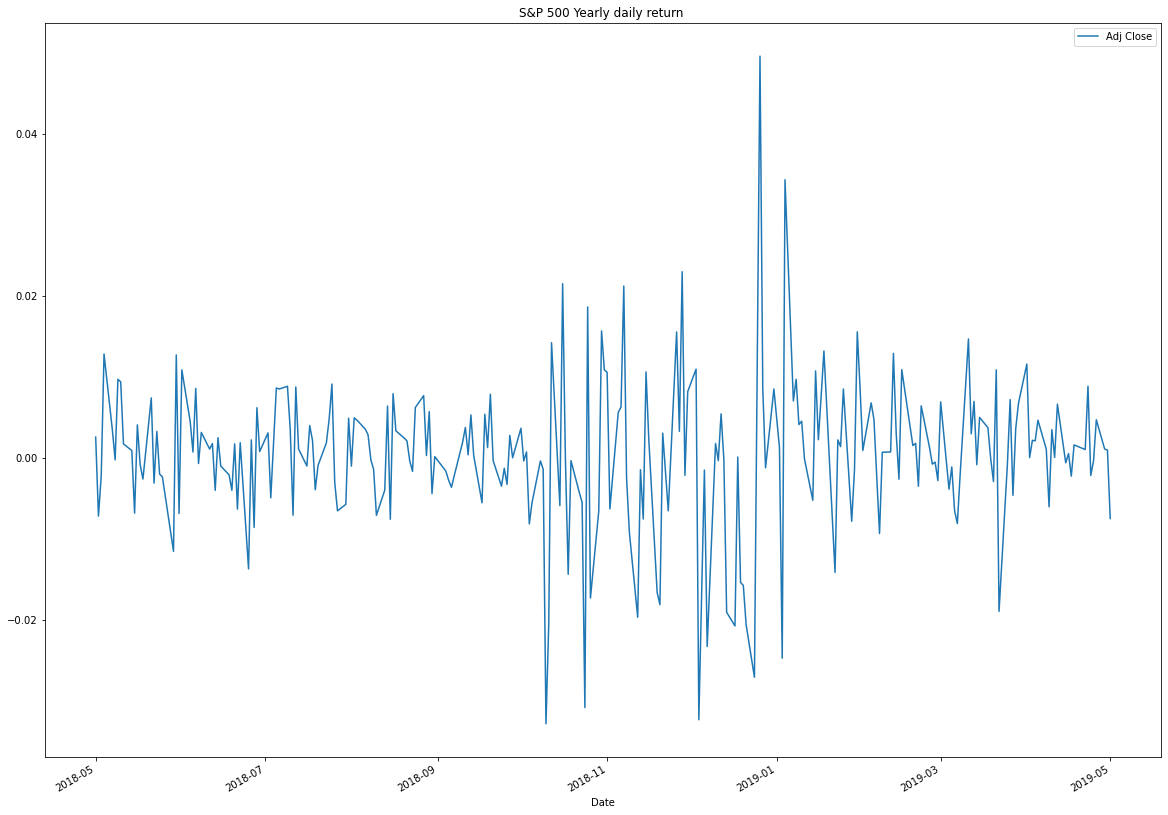

In [51]:
daily_returns_1_year.plot(figsize=(20,15), title="S&P 500 Yearly daily return ")

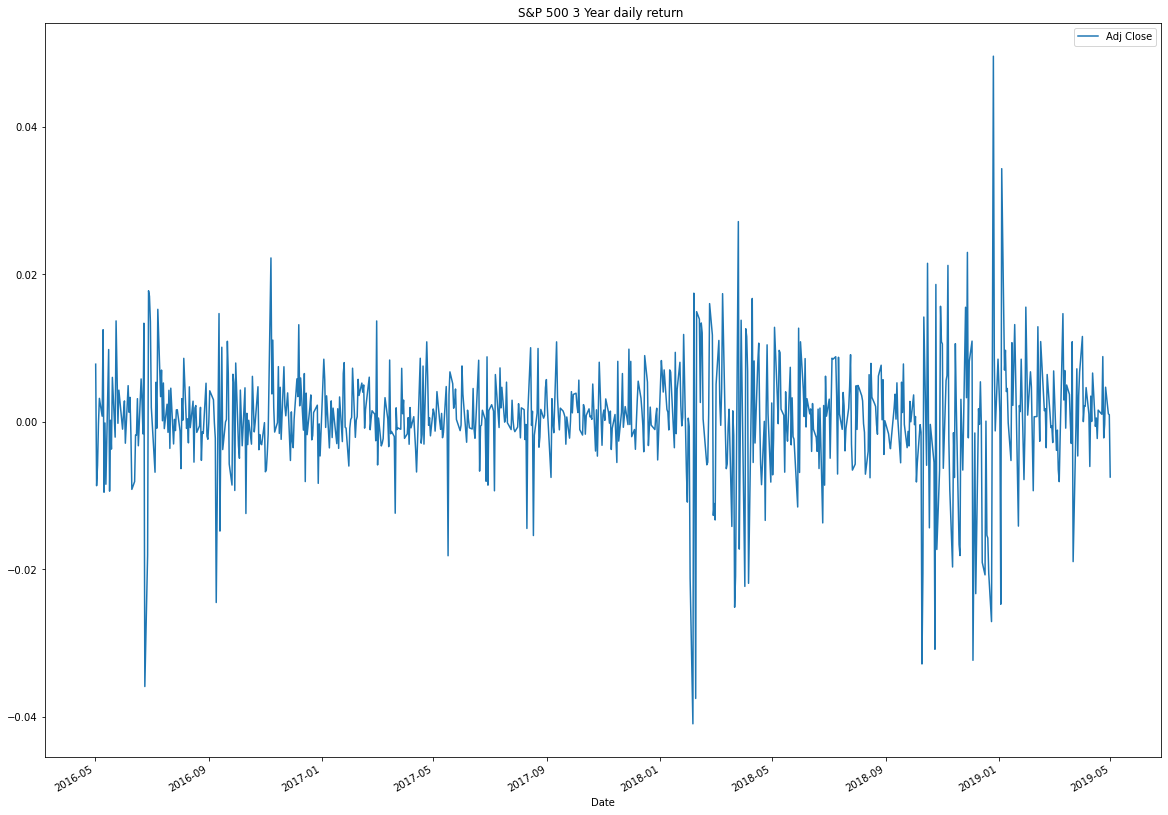

In [52]:
daily_returns_3_year.plot(figsize=(20,15), title="S&P 500 3 Year daily return ")